In [ ]:
# Importing necessary libraries for EDA and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read the data file(s) using pandas
# completeclean = pd.read_excel("Finalcompletecleandata.xlsx")
completeclean = pd.read_excel("Finalcompletecleandata.xlsx")
completeclean.shape
completeclean.drop(columns=["Unnamed: 0","Ease_of_Business",'Key'],inplace=True)
df_clusterinput=completeclean

Hopkins test

In [ ]:
from sklearn.neighbors import NearestNeighbors
from numpy.random import uniform
from random import sample
from math import isnan
import pandas as pd

In [ ]:
# df_clusterinput=completeclean.iloc[:,:-1]
df_clusterinput.head()

,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Country,Days_to_Start_Business,Energy_Usage,GDP,Health_Exp__GDP,Health_Exp_Capita,Hours_to_do_Tax,...,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0_14,Population_15_64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
0,0.020,48.966901,87931.0,Algeria,39.999418,26998.000000,5.479006e+10,0.035,60.0,302.068503,...,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,102000000.0,193000000.0
1,0.050,48.966901,9542.0,Angola,39.999418,7499.000000,9.129595e+09,0.034,22.0,302.068503,...,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,34000000.0,146000000.0
2,0.043,48.966901,1617.0,Benin,39.999418,1983.000000,2.359122e+09,0.043,15.0,302.068503,...,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,77000000.0,50000000.0
3,0.027,48.966901,4276.0,Botswana,39.999418,1836.000000,5.788312e+09,0.047,152.0,302.068503,...,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,227000000.0,209000000.0
4,0.046,48.966901,1041.0,Burkina Faso,39.999418,77236.840896,2.610959e+09,0.051,12.0,302.068503,...,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,23000000.0,30000000.0


In [ ]:
df_clusterinput['numberPopulation_0_14'] = (df_clusterinput['Population_0_14']) * df_clusterinput['Population_Total']
df_clusterinput['numberPopulation_15_64'] = (df_clusterinput['Population_15_64']) * df_clusterinput['Population_Total']
df_clusterinput['numberPopulation_65plus'] = (df_clusterinput['Population_65plus']) * df_clusterinput['Population_Total']
df_clusterinput['numberPopulation_Urban'] =df_clusterinput['Population_Urban']* df_clusterinput['Population_Total']


In [ ]:
df_clusterinput.drop(columns=['Population_0_14','Population_15_64','Population_65plus','Population_Urban','Country'],inplace=True)
df_clusterinput

,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Days_to_Start_Business,Energy_Usage,GDP,Health_Exp__GDP,Health_Exp_Capita,Hours_to_do_Tax,Infant_Mortality_Rate,...,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_Total,Tourism_Inbound,Tourism_Outbound,numberPopulation_0_14,numberPopulation_15_64,numberPopulation_65plus,numberPopulation_Urban
0,0.020000,48.966901,87931.000000,39.999418,2.699800e+04,5.479006e+10,0.03500,60.000000,302.068503,0.034000,...,71.000000,67.000000,0.000000,31719449,1.020000e+08,1.930000e+08,1.084805e+07,1.963434e+07,1.237059e+06,1.899995e+07
1,0.050000,48.966901,9542.000000,39.999418,7.499000e+03,9.129595e+09,0.03400,22.000000,302.068503,0.128000,...,47.000000,44.000000,0.000000,13924930,3.400000e+07,1.460000e+08,6.628267e+06,6.948540e+06,3.481232e+05,4.511677e+06
2,0.043000,48.966901,1617.000000,39.999418,1.983000e+03,2.359122e+09,0.04300,15.000000,302.068503,0.090000,...,57.000000,53.000000,0.000000,6949366,7.700000e+07,5.000000e+07,3.155012e+06,3.592822e+06,2.015316e+05,2.661607e+06
3,0.027000,48.966901,4276.000000,39.999418,1.836000e+03,5.788312e+09,0.04700,152.000000,302.068503,0.054000,...,52.000000,49.000000,0.100000,1755375,2.270000e+08,2.090000e+08,6.723086e+05,1.030405e+06,5.090588e+04,9.338595e+05
4,0.046000,48.966901,1041.000000,39.999418,7.723684e+04,2.610959e+09,0.05100,12.000000,302.068503,0.096000,...,52.000000,49.000000,0.000000,11607944,2.300000e+07,3.000000e+07,5.432518e+06,5.862012e+06,3.250224e+05,2.066214e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.022715,48.966901,142307.107765,39.999418,7.723684e+04,2.638540e+11,0.06417,801.397077,302.068503,0.032813,...,71.159268,66.461838,0.578124,32427,4.939320e+09,4.729435e+09,9.827039e+03,2.021763e+04,2.382236e+03,2.954100e+04
2700,0.013000,46.400000,142307.107765,5.000000,2.132446e+06,1.624460e+13,0.17900,8895.000000,175.000000,0.006000,...,81.000000,76.000000,1.000000,313873685,2.000920e+11,1.265730e+11,6.151924e+07,2.093537e+08,4.268682e+07,2.545516e+08
2701,0.015000,41.900000,142307.107765,7.000000,7.723684e+04,5.000435e+10,0.08900,1308.000000,310.000000,0.010000,...,80.000000,74.000000,1.500000,3395253,2.222000e+09,1.028000e+09,7.469557e+05,2.169567e+06,4.753354e+05,3.218700e+06
2702,0.020000,61.900000,142307.107765,144.000000,7.723684e+04,3.812862e+11,0.04600,593.000000,792.000000,0.013000,...,78.000000,72.000000,1.000000,29954782,9.040000e+08,3.202000e+09,8.626977e+06,1.953052e+07,1.797287e+06,2.662980e+07


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform Min-Max scaling
df_clusterinput_standardized = scaler.fit_transform(df_clusterinput)

# Convert the standardized data array back to a DataFrame
df_clusterinput_standardized = pd.DataFrame(df_clusterinput_standardized, columns=df_clusterinput.columns)

# Calculate the correlation matrix
correlation_matrix = df_clusterinput_standardized.corr()

Assessing clustering tendency of the dataset statistic method

In [ ]:
# Defining Hopkins function
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

        H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [ ]:
# Applying Hopkins function to “df_clusterinput STANDARDISED”
hopkinstatic = hopkins(df_clusterinput_standardized)
hopkinstatic

0.9692864524331356

visual methodCompute the dissimilarity (DM) matrix between the objects in the data set using the Euclidean distance measure
Reorder the DM so that similar objects are close to one another. This process create an ordered dissimilarity matrix (ODM)
The ODM is displayed as an ordered dissimilarity image (ODI), which is the visual output of VAT

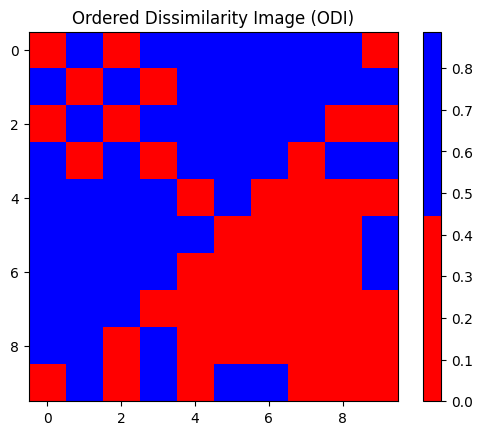

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.spatial.distance import pdist, squareform

def compute_vat(data):
    # Step 1: Compute the dissimilarity matrix using Euclidean distance
    dm = squareform(pdist(data, 'euclidean'))

    # Step 2: Compute the ordered dissimilarity matrix (ODM)
    n = len(dm)
    ordered_indices = np.zeros(n, dtype=int)
    remaining_indices = np.arange(n)

    for i in range(n):
        remaining_dm = dm[remaining_indices, :]
        remaining_dm = remaining_dm[:, remaining_indices]
        max_val = np.max(remaining_dm)
        max_index = np.unravel_index(np.argmax(remaining_dm), remaining_dm.shape)
        ordered_indices[i] = remaining_indices[max_index[0]]
        remaining_indices = np.delete(remaining_indices, max_index[0])

    # Step 3: Create the ordered dissimilarity matrix (ODM)
    odm = dm[ordered_indices, :]
    odm = odm[:, ordered_indices]

    return odm

def plot_ordered_dissimilarity_image(odm):
    # Step 4: Create a custom colormap for blue (similarity) and red (dissimilarity)
    colors = ['red', 'blue']
    cmap = ListedColormap(colors)

    # Step 5: Display the ordered dissimilarity image (ODI) with the custom colormap
    plt.imshow(odm, cmap=cmap, vmin=np.min(odm), vmax=np.max(odm))
    plt.colorbar()
    plt.title("Ordered Dissimilarity Image (ODI)")
    plt.show()

# Example usage:
# Generate some sample data for demonstration purposes
data = np.random.rand(10, 2)

# Compute the ordered dissimilarity matrix (ODM) using VAT
odm = compute_vat(data)

# Plot the ordered dissimilarity image (ODI) with the custom colormap
plot_ordered_dissimilarity_image(odm)


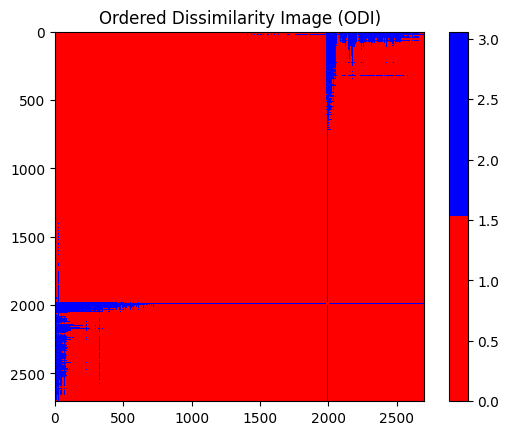

In [ ]:
# plotting global data
odm1 = compute_vat(df_clusterinput_standardized)
plot_ordered_dissimilarity_image(odm1)

 if H (hopkinstatic)< 0.5, then it is unlikely that D has statistically significant clusters.

If the value of Hopkins statistic is close to 1, then we can reject the null hypothesis and conclude that the dataset D is significantly a clusterable data.

Here we can conclude that the given cluster is significantly a clusterable data

uSiNG ONLY SELECTED COLUMNS

In [ ]:
# # Select the numeric columns for plotting
# numeric_columns = df_clusterinput.select_dtypes(include='number')

# # Plot histogram with KDE for each numeric column
# for column in numeric_columns.columns:
#     sns.histplot(data=df_clusterinput, x=column, kde=True)
#     plt.title(f'Histogram with KDE - {column}')
#     plt.xlabel(column)
#     plt.ylabel('Count')
#     plt.show()

In [ ]:
df_clusterinput_standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Birth_Rate               2704 non-null   float64
 1   Business_Tax_Rate        2704 non-null   float64
 2   CO2_Emissions            2704 non-null   float64
 3   Days_to_Start_Business   2704 non-null   float64
 4   Energy_Usage             2704 non-null   float64
 5   GDP                      2704 non-null   float64
 6   Health_Exp__GDP          2704 non-null   float64
 7   Health_Exp_Capita        2704 non-null   float64
 8   Hours_to_do_Tax          2704 non-null   float64
 9   Infant_Mortality_Rate    2704 non-null   float64
 10  Internet_Usage           2704 non-null   float64
 11  Lending_Interest         2704 non-null   float64
 12  Life_Expectancy_Female   2704 non-null   float64
 13  Life_Expectancy_Male     2704 non-null   float64
 14  Mobile_Phone_Usage      

In [ ]:
#
# df_clusterinput_standardized = df_clusterinput_standardized.iloc[:,]
df_clusterinput_standardized.head()

,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Days_to_Start_Business,Energy_Usage,GDP,Health_Exp__GDP,Health_Exp_Capita,Hours_to_do_Tax,Infant_Mortality_Rate,...,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_Total,Tourism_Inbound,Tourism_Outbound,numberPopulation_0_14,numberPopulation_15_64,numberPopulation_65plus,numberPopulation_Urban
0,0.282609,0.1232,0.010610,0.056276,0.009895,0.003369,0.124424,0.005855,0.112082,0.230216,...,0.666667,0.588235,0.000000,0.023470,0.000506,0.001523,0.029772,0.019820,0.010516,0.027097
1,0.934783,0.1232,0.001151,0.056276,0.002746,0.000558,0.119816,0.002019,0.112082,0.906475,...,0.166667,0.137255,0.000000,0.010296,0.000166,0.001152,0.018185,0.007007,0.002951,0.006429
2,0.782609,0.1232,0.000194,0.056276,0.000724,0.000141,0.161290,0.001312,0.112082,0.633094,...,0.375000,0.313725,0.000000,0.005131,0.000381,0.000393,0.008648,0.003617,0.001703,0.003790
3,0.434783,0.1232,0.000515,0.056276,0.000670,0.000352,0.179724,0.015142,0.112082,0.374101,...,0.270833,0.235294,0.034483,0.001286,0.001131,0.001650,0.001830,0.001029,0.000421,0.001325
4,0.847826,0.1232,0.000125,0.056276,0.028313,0.000157,0.198157,0.001009,0.112082,0.676259,...,0.270833,0.235294,0.000000,0.008580,0.000111,0.000235,0.014902,0.005909,0.002754,0.002940


hierRCHIEAL clustering

In [ ]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
def Herirachial_clustering(dfstd,max_d):

# Linkage method can be 'single', 'complete', 'average', 'ward', etc.
# 'ward' is generally used for Euclidean distance and results in more balanced clusters


    Z = linkage(dfstd, method='complete')
    # create dendograms
    plt.figure(figsize=(12, 6))
    dendrogram(Z)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()
    # as observed from the above dendogram we the desired number of clusters =3
    max_d = max_d
    clusters = fcluster(Z, max_d, criterion='distance')
    # clusters is the array containing the cluster labels for each data point
    clusters

    # Create a new column 'Cluster' in your DataFrame
    # df_clusterinput['Cluster'] = clusters

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(dfstd, clusters)

    # Print the silhouette score
    print("The kmean average silhouette score is:", silhouette_avg)
    return clusters


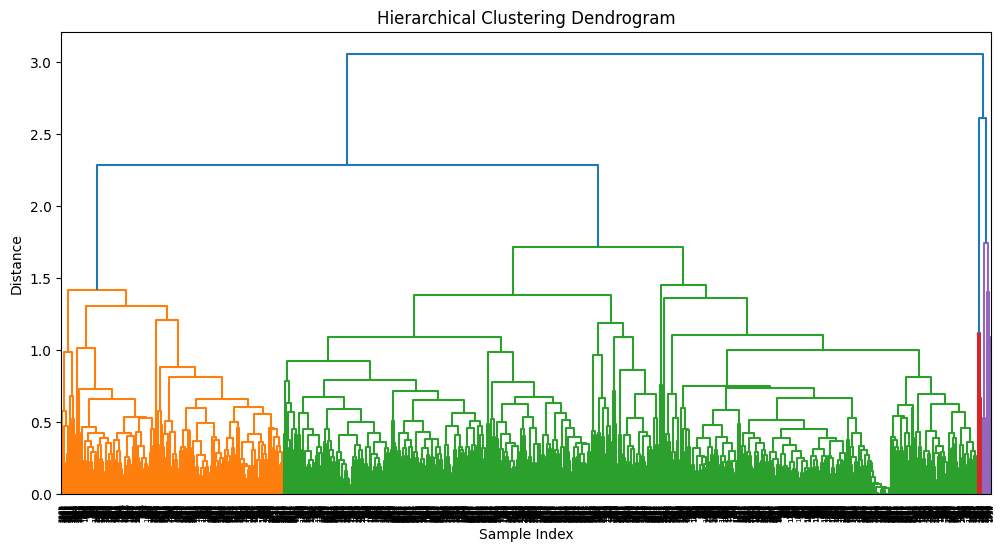

The kmean average silhouette score is: 0.6379485667517414


In [ ]:
kmeanclusters=Herirachial_clustering(df_clusterinput_standardized,3)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
def Agglomerative_clustering(dfstd, n_clusters):
    # Perform Agglomerative Clustering
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    clusters = pd.Series(model.fit_predict(dfstd))

    # Plot dendrogram
    Z = linkage(dfstd, method='ward')
    # plt.figure(figsize=(12, 6))
    # dendrogram(Z)
    # plt.title('Agglomerative Clustering Dendrogram')
    # plt.xlabel('Sample Index')
    # plt.ylabel('Distance')
    # plt.show()

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(dfstd, clusters)
    print("The Agglomerative Clustering average silhouette score is:", silhouette_avg)

    return clusters

In [ ]:
Agglomerative_clustering(df_clusterinput_standardized,3)

The Agglomerative Clustering average silhouette score is: 0.3406600534137644


0       2
1       1
2       1
3       1
4       1
       ..
2699    2
2700    0
2701    0
2702    2
2703    0
Length: 2704, dtype: int64

k mean **clustering**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


def kmean_clustering_knee(dfstd,max_c):
# Calculate inertia for different values of k
    max_clusters=max_c
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(dfstd)
        inertia.append(kmeans.inertia_)

    # Plot the knee plot
    plt.plot(range(1, max_clusters + 1), inertia)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Distances (Inertia)')
    plt.title('Knee Plot for K-means Clustering')
    plt.show()


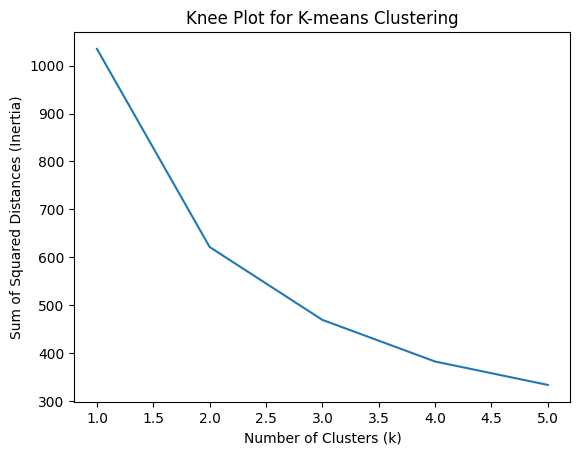

In [ ]:
kmean_clustering_knee(df_clusterinput_standardized,5)

In [ ]:
from sklearn.cluster import KMeans

def preform_KMeanClustering(dfstd,max_c):

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=max_c)
    kmeanclusters = kmeans.fit_predict(df_clusterinput_standardized)

    # Create a new column 'Cluster' in your DataFrame
    # df_clusterinput_standardized['Cluster'] = clusters

    from sklearn.metrics import silhouette_score
    # Calculate the silhouette score
    kmeansilhouette_avg = silhouette_score(dfstd, kmeanclusters)

    # Print the silhouette score
    print("The kmean average silhouette score is:", kmeansilhouette_avg)
    return kmeanclusters

In [ ]:
kmeanclusters = preform_KMeanClustering(df_clusterinput_standardized,3)
np.unique(kmeanclusters)

The kmean average silhouette score is: 0.3370213377809452


array([0, 1, 2], dtype=int32)

DBSCAN CLUSTERING

In [ ]:
from sklearn.cluster import DBSCAN

def performDBSCAN(eps,min_samples,dfstd):
    # eps = 0.5  # Epsilon, neighborhood radius
    # min_samples = 3  # Minimum number of samples in a neighborhood

    # Create DBSCAN object and fit the data
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscanclusters = dbscan.fit_predict(dfstd)  # Exclude the last column (target variable) from clustering

    # # Add the cluster labels back to the DataFrame
    # df_clusterinput['Cluster'] = clusters

    from sklearn.metrics import silhouette_score
    # Calculate the silhouette score
    dbscansilhouette_avg = silhouette_score(dfstd, dbscanclusters)

    # Print the silhouette score
    print("The DBSCAN silhouette score is:", dbscansilhouette_avg)
    return dbscanclusters



In [ ]:
performDBSCAN(0.5,3,df_clusterinput_standardized)

The DBSCAN silhouette score is: 0.3520825272242193


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# To check if outliers exist in each column of the DataFrame and then apply outlier capping using the IQR method

import pandas as pd
import numpy as np

def cap_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    capped_df = df.copy()
    for column in df.columns:
        lower_outliers = df[column] < lower_bound[column]
        upper_outliers = df[column] > upper_bound[column]
        capped_df.loc[lower_outliers, column] = lower_bound[column]
        capped_df.loc[upper_outliers, column] = upper_bound[column]

    return capped_df

# Check if outliers exist
outliers_exist = (df_clusterinput_standardized < df_clusterinput_standardized.quantile(0.25) - 1.5 * (df_clusterinput_standardized.quantile(0.75) - df_clusterinput_standardized.quantile(0.25))) | (df_clusterinput_standardized > df_clusterinput_standardized.quantile(0.75) + 1.5 * (df_clusterinput_standardized.quantile(0.75) - df_clusterinput_standardized.quantile(0.25)))

# Apply outlier capping if outliers exist
if outliers_exist.any().any():
    df_capped = cap_outliers_iqr(df_clusterinput_standardized)
else:
    df_capped = df_clusterinput_standardized.copy()


calling all the functions of different clusters after capping the data

In [ ]:
# kmeanclusters=Herirachial_clustering(df_capped,3)

In [ ]:
Agglomerative_clustering(df_capped,3)
kmeanclusters = preform_KMeanClustering(df_capped,3)
# performDBSCAN(0.5,3,df_capped)

The Agglomerative Clustering average silhouette score is: 0.32606024937919215
The kmean average silhouette score is: 0.38674982986298395


PC1: 0.5729
PC2: 0.1161
PC3: 0.1056
PC4: 0.0456
PC5: 0.0283
PC6: 0.0241
PC7: 0.0216
PC8: 0.0196

Principal Components:


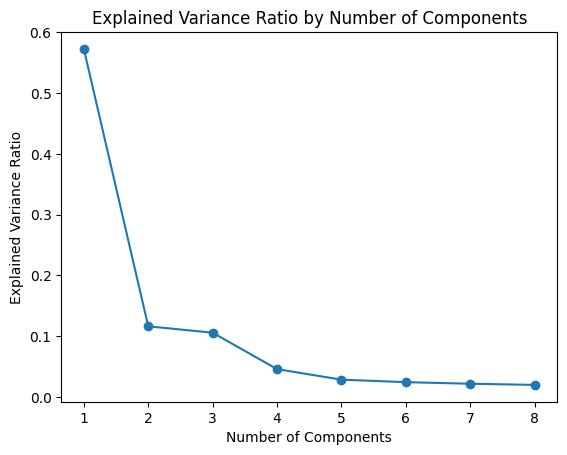

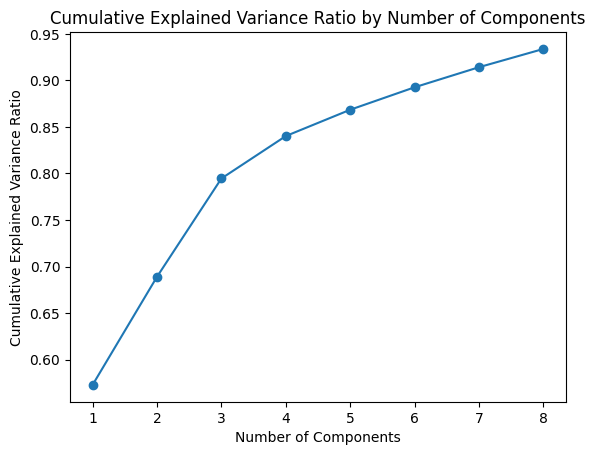

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming your dataset is stored in a DataFrame called 'df'
def performPCA(n_components,df):
    # Instantiate PCA with the desired number of components
    # n_components = 5  # Specify the number of principal components you want to keep
    pca = PCA(n_components=n_components)

    # Perform PCA on the dataset
    principal_components = pca.fit_transform(df)

    # Access the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_

    # Access the principal components (transformed data)
    principal_df = pd.DataFrame(data=principal_components, columns=[f"PC{i+1}" for i in range(n_components)])

    # Print the explained variance ratio
    # print("Explained Variance Ratio:")
    for i, ratio in enumerate(explained_variance_ratio):
        print(f"PC{i+1}: {ratio:.4f}")

    # Print the principal components (transformed data)
    print("\nPrincipal Components:")
    # print(principal_df.head())


    # Calculate the cumulative explained variance ratio
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    # Plot the explained variance ratio
    plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio by Number of Components')
    plt.show()

    # Plot the cumulative explained variance ratio
    plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Cumulative Explained Variance Ratio by Number of Components')
    plt.show()
    return principal_df

PCA_df= performPCA(8,df_clusterinput_standardized)


In [ ]:
Agglomerative_clustering(PCA_df,3)
kmeanclusters = preform_KMeanClustering(PCA_df,3)
performDBSCAN(0.5,3,PCA_df)

The Agglomerative Clustering average silhouette score is: 0.36448566015229433
The kmean average silhouette score is: 0.36778422053140053
The DBSCAN silhouette score is: 0.6327416757784201


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# hyperparameter
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

X=df_clusterinput_standardized
# K-means Clustering Hyperparameter Tuning
kmeans = KMeans()
kmeans_params = {'n_clusters': [2, 3, 4, 5]}

kmeans_grid = GridSearchCV(kmeans, kmeans_params)
kmeans_grid.fit(X)  # X is  input data

best_kmeans = kmeans_grid.best_estimator_
best_kmeans_params = kmeans_grid.best_params_
print('kmean hyperparameter tuning results-',best_kmeans_params)
# Agglomerative Clustering Hyperparameter Tuning
agglomerative = AgglomerativeClustering()
agglomerative_params = {'n_clusters': [2, 3, 4, 5], 'linkage': ['ward', 'complete', 'average']}


scorer = silhouette_score  # Use silhouette score as the evaluation metric

agglomerative_grid = GridSearchCV(agglomerative, agglomerative_params, scoring=scorer)
agglomerative_grid.fit(X)  # X is your input data

best_agglomerative = agglomerative_grid.best_estimator_
best_agglomerative_params = agglomerative_grid.best_params_
print('agglomerative hyperparameter tuning results-',best_agglomerative_params)

# DBSCAN Clustering Hyperparameter Tuning
dbscan = DBSCAN()
dbscan_params = {'eps': [0.1, 0.5, 1.0], 'min_samples': [2, 5, 10]}  # Example parameter grid

dbscan_grid = GridSearchCV(dbscan, dbscan_params,scoring=scorer)
dbscan_grid.fit(X)  # X is your input data

best_dbscan = dbscan_grid.best_estimator_
best_dbscan_params = dbscan_grid.best_params_
print('DBSCAN hyperparameter tuning results-',best_dbscan_params)


kmean hyperparameter tuning results- {'n_clusters': 5}
agglomerative hyperparameter tuning results- {'linkage': 'ward', 'n_clusters': 2}
DBSCAN hyperparameter tuning results- {'eps': 0.1, 'min_samples': 2}


In [ ]:
# CLUSTERING AFTER HYPERPARAMETER  TUNING
# Herirachial_clustering(df_clusterinput_standardized,2)
agglomerative_clusters = cluster = Agglomerative_clustering(df_clusterinput_standardized,2)
kmeanclusters=preform_KMeanClustering(df_clusterinput_standardized,5)
performDBSCAN(0.1,2,df_clusterinput_standardized)

The Agglomerative Clustering average silhouette score is: 0.39914402961587575
The kmean average silhouette score is: 0.30878245438061386
The DBSCAN silhouette score is: 0.20748058994730154


array([  0,   1,   2, ..., 475,  -1, 382])

In [ ]:

unique_categories, category_counts = np.unique(agglomerative_clusters, return_counts=True)

for category, count in zip(unique_categories, category_counts):
    print(f"Category {category}: {count} occurrences")

Category 0: 2024 occurrences
Category 1: 680 occurrences


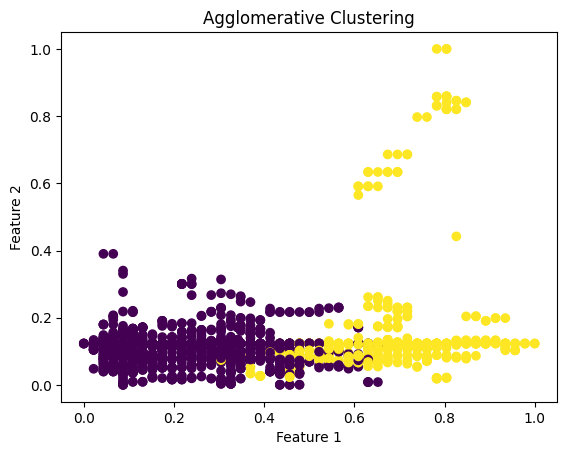

In [ ]:
# df_clusterinput_standardized['df_clusterinput_standardized']
plt.scatter(df_clusterinput_standardized.values[:,0], df_clusterinput_standardized.values[:,1], c=agglomerative_clusters)
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
completeclean = pd.read_excel("Finalcompletecleandata.xlsx")
completeclean.shape
data=completeclean.drop(columns=["Unnamed: 0","Ease_of_Business",'Key'])


X = data.drop(columns=['Country','GDP'])
y = data['GDP']

# Create a Random Forest regressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a list of (feature, importance) tuples
feature_importances = list(zip(X.columns, importances))

# Sort the feature importances in decreasing order
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Print feature importances in decreasing order
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

Tourism_Inbound: 0.46883848946038137
Energy_Usage: 0.2302543467277871
Tourism_Outbound: 0.22636398220663323
Population_Total: 0.020057976959769953
Population_0_14: 0.00876601860823115
Health_Exp__GDP: 0.0066882147677229465
Population_Urban: 0.004756822954869552
Infant_Mortality_Rate: 0.004586111830301687
Population_15_64: 0.004559153063253529
Health_Exp_Capita: 0.004335833580928359
Lending_Interest: 0.004219777147945843
CO2_Emissions: 0.0034410057541948776
Hours_to_do_Tax: 0.0029218184254038116
Mobile_Phone_Usage: 0.0018968897542164045
Life_Expectancy_Male: 0.001742895216412075
Business_Tax_Rate: 0.0016869778365178258
Population_65plus: 0.0016353405426976421
Days_to_Start_Business: 0.0011462682294355432
Life_Expectancy_Female: 0.0009083700470431552
Internet_Usage: 0.0007335171288287959
Birth_Rate: 0.00046018975742521983
